# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

In [2]:
df = pd.read_csv("../data/absences.csv", index_col=0)
df.head()

,EmployeeID,Age,Absences
0,1,27,15
1,2,61,6
2,3,37,10
3,4,23,18
4,5,46,9


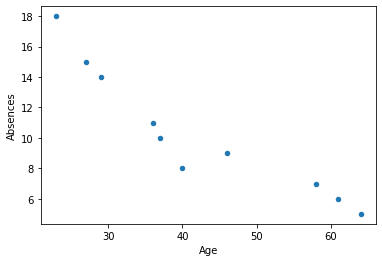

In [3]:
df.plot.scatter("Age", "Absences")

In [4]:
'''
Age and absences seem to follow a negative linear regression (the older the employee, the less absences)
'''

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [5]:
def regression(x,y):
    numerator = 0
    denominator = 0
    for i in range(len(x)):
        numerator += (x[i]-np.mean(x))*(y[i]-np.mean(y))
        denominator += (x[i]-np.mean(x))**2
    slope = numerator / denominator
    intercept = np.mean(y) - slope * np.mean(x)
    return (slope, intercept)

In [6]:
regression(df["Age"],df["Absences"])
slope = regression(df["Age"],df["Absences"])[0]
intercept = regression(df["Age"],df["Absences"])[1]
print(f'slope = {slope}\nintercept = {intercept}\nregression line: y = {round(slope,4)}x + {round(intercept, 4)}')

slope = -0.2681088337033404
intercept = 21.58738189891063
regression line: y = -0.2681x + 21.5874


#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

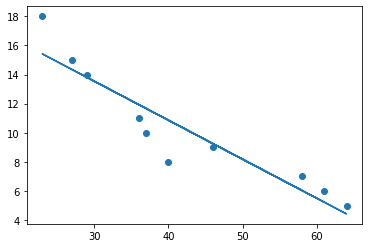

In [7]:
# compute predictes values for each i in df.Ages
predicted_absences = list(map(lambda x: slope*x+intercept, df.Age))

# plot regression line by assigning x=df.Ages and y=predicted absences + scatter plot of real observations
plt.scatter(df.Age,df.Absences)
plt.plot(df.Age,predicted_absences)
plt.show()

In [8]:
''''
- The regression line is negative.
- The slope of the regression indicates that for each extra year of age, an employee has 0.27 less absences.
'''

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [9]:
def covariance(x,y):
    numerator = 0
    for i in range(len(x)):
        numerator += (x[i]-np.mean(x))*(y[i]-np.mean(y))
    return numerator/(len(x)-1)

In [84]:
def correlation(x,y):
    numerator = 0
    denominator_x = 0
    denominator_y = 0
    for i in range(len(x)):
        numerator += (x[i]-np.mean(x))*(y[i]-np.mean(y))
        denominator_x += ((x[i]-np.mean(x))**2)
        denominator_y += ((y[i]-np.mean(y))**2)
    return numerator / (denominator_x*denominator_y)**(1/2)

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [39]:
print('Covariance =', covariance(df["Age"],df["Absences"]))
print('Correlation =', correlation(df["Age"],df["Absences"]))
print('R-squared =', (correlation(df["Age"],df["Absences"]))**2)

Covariance = -57.699999999999996
Correlation = -0.9325434092481012
R-squared = 0.8696372101320715


In [12]:
'''
- A correlation of -0.93 indicates a strong negative linear correlation between the two variables (absences 
decrease as age increases).
'''

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [13]:
'''
- We can confirm the hypothesis that there is a negative correlation between age and absenteeism 
- The correlation is strong (r=-0.93)
- for each extra year of age, an employee has 0.27 less absences)
- The intercept cannot be interpreted as there are not 0-year-old employees. 
'''

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [77]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [15]:
print('Covariance =', covariance(ironbeers_df.X, ironbeers_df.Y))
print('Correlation =', correlation(ironbeers_df.X, ironbeers_df.Y))
print('R-squared =', (correlation(ironbeers_df.X, ironbeers_df.Y))**2)

Covariance = 12.0
Correlation = 0.9770084209183943
R-squared = 0.9545454545454545


In [16]:
'''
There is a strong positive correlation between the two variables (the more people you tell, the more that come)
'''

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

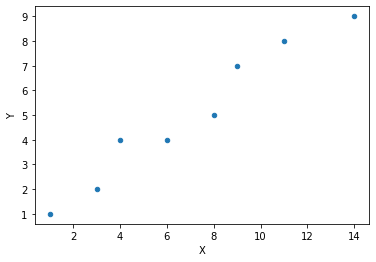

In [17]:
ironbeers_df.plot.scatter("X", "Y")

In [18]:
'''
The two variables seem to follow possitive linear regression. 
'''

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [19]:
regression(ironbeers_df.X,ironbeers_df.Y)
slope = regression(ironbeers_df.X,ironbeers_df.Y)[0]
intercept = regression(ironbeers_df.X,ironbeers_df.Y)[1]

print(f'slope = {slope}\nintercept = {intercept}\nregression line: y = {round(slope,4)}x + {round(intercept, 4)}')

slope = 0.6363636363636364
intercept = 0.5454545454545459
regression line: y = 0.6364x + 0.5455


In [20]:
'''
The positive value of the slope confirms that the number of people coming increases as more people are told.  
'''

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [21]:
'''
- We can reject our hypotheses that telling more people causes them to not stay.
- Contrarly, for every extra people we tell, 0.64 more are coming.
- The correlation between the two variables is very strong (r=0.98)
'''

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [78]:
ironbeers_df["expected_Y"] = slope*ironbeers_df.X+intercept
ironbeers_df

,X,Y,expected_Y
0,1,1,1.181818
1,3,2,2.454545
2,4,4,3.090909
3,6,4,4.363636
4,8,5,5.636364
5,9,7,6.272727
6,11,8,7.545455
7,14,9,9.454545


#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

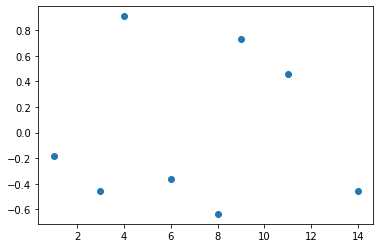

In [79]:
ironbeers_df["error"] = ironbeers_df.Y - expected_Y
plt.scatter(ironbeers_df.X, ironbeers_df.error)

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [42]:
'''
- All observation are less than 1 point away from the predicted value
- 5/8 errors are negative, while 3/8 are positive
- The errors for x={4, 8, 9} are particularly high
'''

#### 4.- Remove the points with a high error and recalculate the regression line.

In [92]:
ironbeers_df2 = ironbeers_df.drop(index=[2,4,5])
ironbeers_df2

,X,Y,expected_Y,error
0,1,1,1.181818,-0.181818
1,3,2,2.454545,-0.454545
3,6,4,4.363636,-0.363636
6,11,8,7.545455,0.454545
7,14,9,9.454545,-0.454545


#### 5.- Calculate the correlation. What is happening? Comment the result.

In [96]:
# For some reason it's not working directly with the function I made before
x = list(ironbeers_df2.X)
y = list(ironbeers_df2.Y)
correlation(x,y)

0.9945299478460592

In [27]:
'''
The correlation is higher as we droped the values further away from the regression line, thus reducing the errors. 
'''